# TSIA202a - Second Practice Session : Spectral density estimation and periodogram
The goal of this second session is to provide a power spectral density estimator of a real, zero-mean, weakly stationary process $X_t$. We suppose that we have access to $n$ observations and we will use the FFT algorithm (that implements the DFT) using `numpy.fft.module`.
Recall (from the course) that the periodogram of the observations $X_0, \dots, X_{n-1}$ can be given as:
$$
I_n(\lambda) = \frac{1}{2\pi n}|\sum_{k=0}^{n-1} X_k e^{i\lambda k}|^2
$$

Moreover, the Hertglotz theorem provides a relation between the empirical autocovariance $\hat{\gamma}_n$ and the periodogram $I_n$:
$$
\hat{\gamma}_n(k) = \int_{0}^{2\pi}e^{i\lambda k}I_n({\lambda})d\lambda
$$

1. For a given $m \geq n$  we denote also the DFT as:
$$
DFT(X,m)(k) = \sum_{h=0}^{n-1}X_he^{-2i\pi\frac{kh}{m}}
$$
Show the following relation: 
$$I_n(\frac{2\pi k}{m}) = \frac{1}{2\pi n} |DFT(X,m)(k)|^2$$





**Answer:**
<br>we know that
$$
I_n(\lambda) = \frac{1}{2\pi n}|\sum_{k=0}^{n-1} X_k e^{i\lambda k}|^2
$$
if we replace  $\lambda$ with $\frac{2\pi k}{m}$ we find that $I_n(\frac{2\pi k}{m}) = \frac{1}{2\pi n} |\sum_{h=0}^{n-1} X_h e^{i \frac{2\pi hk}{m}}|^2 $
<br>Thus: $$I_n(\frac{2\pi k}{m}) = \frac{1}{2\pi n} |DFT(X,m)(k)|^2$$


2. provide a script that compute those $I_n(\frac{2\pi k}{m})$ for the time series mentioned in the first practice session


**Answer:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Defining the factors of the random variables
N = 50
K = 100
MEAN = 0
SIGMA = 1
A = 1
B = 1
A0 = 1
LAMBDA0 = 1
indexes = np.arange(N)

In [3]:
#This here is the white noise variable, defined in the first session TP
def white_nosie(number_var):
    return np.random.normal(MEAN,SIGMA, number_var)

##This here is the second random Variable, defined in the first session TP
##X_t = a +bZ_t-1 + Z_t
def sum_white_noise(number_variable):
    X = white_nosie(number_variable)
    X_1 = white_nosie(number_var=1)
    X_rounded = np.roll(X,1)
    X_rounded = A + B*X + X_rounded
    X_rounded[0] = A + B*X[0] + X_1[0]  
    return X_rounded

#This one computes the sum of the random variables multiplied by 2 to the power of the variable's indexc
def geometric_white_noise(number_variables):
    X = white_nosie(number_variables+K) # generate a white noise 
    summed_variables = np.zeros(number_variables) # generate array of zeros with the same size of random variable
    # Sum on all of the number of random varibales
    for j in range(number_variables):
        #This index is exactly the random variable defines in the last TP's question

        ##Fixed j => k and it should work now
        summed_variables[j] = np.sum(np.fromiter(((2**-k)*X[j-k+K] for k in range(K+1)),dtype=float))

    return summed_variables + A 

#This function defines the harmonic process in the exercise
def cos_noise(number_variables):
    T=np.arange(0,number_variables) # An array of the number of random variable
    PHI = np.random.uniform(0,2*np.pi)
    return A0*np.cos(LAMBDA0*T+PHI)+np.random.normal(MEAN,SIGMA,number_variables) # returns the cos function


Since we should work with zero mean random variables the definition of I will be as follows:

In [4]:
def I(X, m):
    n=len(X)
    dft = np.fft.fft(X-np.mean(X), m)
    I = 1/(2*n*np.pi) * np.abs(dft)**2
    return I

In [5]:
#call the white noise function
X_WN = white_nosie(number_var=N)

#Let us call the sum random variable
X_sum_WN = sum_white_noise(number_variable=N)

#Let us call the geometric sum random variable
X_sum_geometric_WN = geometric_white_noise(number_variables=N)

#Let us call the harmonic process
X_cos_WN = cos_noise(number_variables=N)

We should not forget that $m \geq n$ :

In [6]:
m = 100 #m > n
print("The periodogram of WN \n", I(X_WN, m=m))
print("**************************************")
print("The periodogram of X_sum_WN \n", I(X_sum_WN, m=m))
print("**************************************")
print("The periodogram of X_sum_geometric_WN \n", I(X_sum_geometric_WN, m=m))
print("**************************************")
print("The periodogram of Harmonic process \n", I(X_cos_WN, m=m))
print("**************************************")

The periodogram of WN 
 [7.59584230e-32 7.68811763e-02 2.71246568e-02 2.14900272e-01
 4.79826690e-01 9.84162284e-02 7.89619240e-02 5.24462072e-02
 2.68751053e-02 1.67275919e-01 3.61924626e-01 1.74426551e-01
 1.72205213e-02 1.13317587e-01 3.70264080e-02 1.73621649e-01
 7.82627510e-02 1.50741145e-02 3.20167148e-02 3.55293115e-02
 9.89492734e-02 1.19345225e-02 6.52946091e-02 3.13709177e-02
 1.70454909e-01 1.67864584e-01 2.28092811e-03 1.20905427e-01
 8.48870322e-02 6.68596541e-02 1.43132977e-01 1.75125662e-01
 1.23160706e-01 1.97400542e-01 1.98348949e-02 1.76487617e-01
 2.23913210e-01 1.25053803e-01 1.95613538e-01 1.11133673e-01
 1.92346010e-01 2.35123198e-01 1.41720188e-01 7.05087413e-02
 1.08572605e-02 1.08928548e-01 1.24586792e-01 5.88335000e-03
 5.70856735e-02 1.18610398e-01 1.03444515e-01 1.18610398e-01
 5.70856735e-02 5.88335000e-03 1.24586792e-01 1.08928548e-01
 1.08572605e-02 7.05087413e-02 1.41720188e-01 2.35123198e-01
 1.92346010e-01 1.11133673e-01 1.95613538e-01 1.25053803e-01


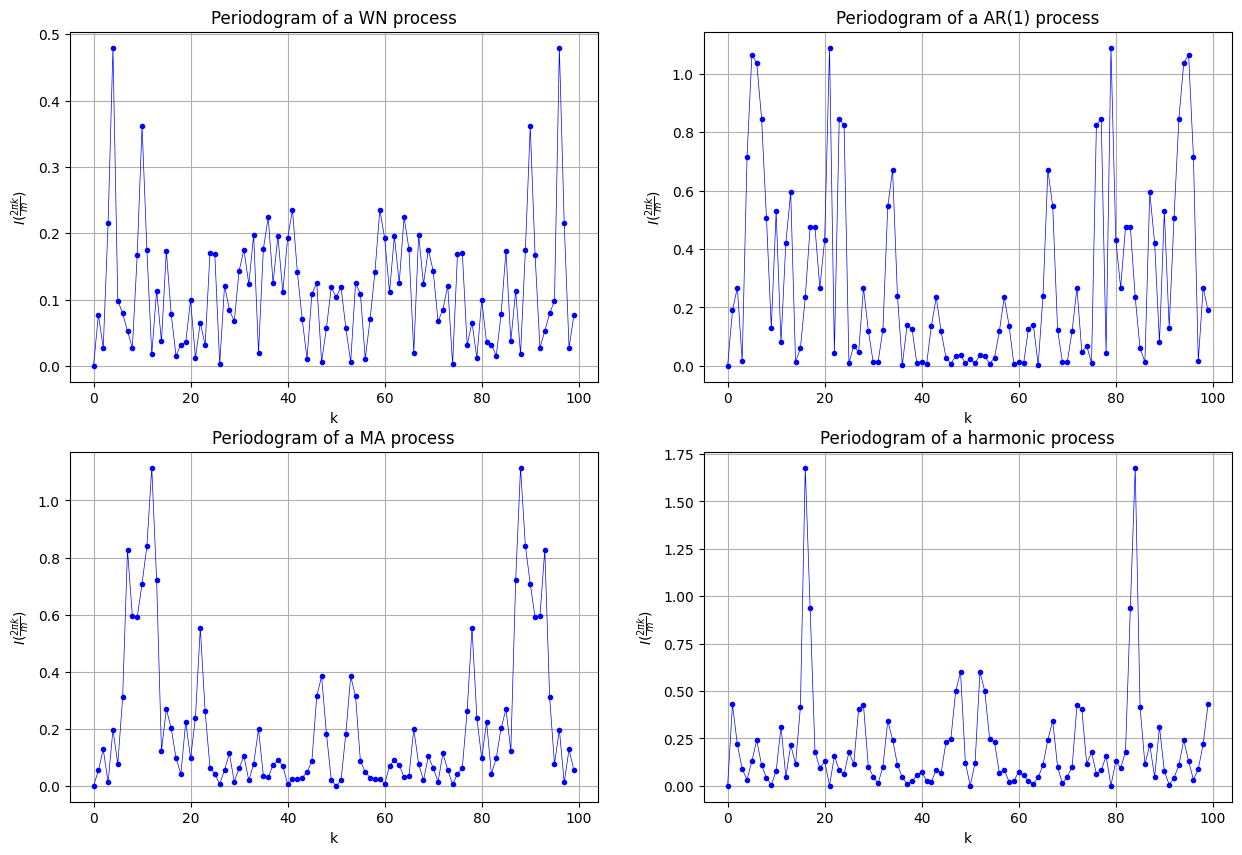

In [7]:
# Plotting the power spectrum for each signal
fig, axes = plt.subplots(2, 2, figsize=(15, 10))


axes[0, 0].plot(I(X_WN, m=m), color='blue', linewidth=0.5, marker=".")
axes[0, 0].set_title('Periodogram of a WN process')
axes[0, 0].set_xlabel("k")
axes[0, 0].set_ylabel(r'$I(\frac{2 \pi k}{m})$')
axes[0, 0].grid()


axes[0, 1].plot(I(X_sum_WN, m=m), color='blue', linewidth=0.5, marker=".")
axes[0, 1].set_title('Periodogram of a AR(1) process')
axes[0, 1].set_xlabel("k")
axes[0, 1].set_ylabel(r'$I(\frac{2 \pi k}{m})$')
axes[0, 1].grid()


axes[1, 0].plot(I(X_sum_geometric_WN, m=m), color='blue',linewidth=0.5, marker=".")
axes[1, 0].set_title('Periodogram of a MA process')
axes[1, 0].set_xlabel("k")
axes[1, 0].set_ylabel(r'$I(\frac{2 \pi k}{m})$')
axes[1, 0].grid()


axes[1, 1].plot(I(X_cos_WN, m=m), color='blue', linewidth=0.5, marker=".")
axes[1, 1].set_title('Periodogram of a harmonic process')
axes[1, 1].set_xlabel("k")
axes[1, 1].set_ylabel(r'$I(\frac{2 \pi k}{m})$')
axes[1, 1].grid()
plt.show()

3. Show that $I_n(\lambda) = \frac{1}{2\pi} \sum_{k=0}^{n-1} \hat{\gamma}_n(k)e^{-i\lambda k}$

- We know that : $$ I_n(\lambda) = \frac{1}{2\pi n}|\sum_{k=0}^{n-1} X_k e^{i\lambda k}|^2 $$
$$
\begin{align*}
\hat{\gamma}_{n}(k) &= \int_{0}^{2\pi} e^{i\lambda k}I_n({\lambda})d\lambda\\
&=\int_{0}^{2\pi}e^{i\lambda k}\frac{1}{2\pi n}|\sum_{l=0}^{n-1} X_l e^{i\lambda l}|^2d\lambda\\
&=\frac{1}{2\pi n}\int_{0}^{2\pi}|\sum_{h=0}^{n-1} X_h e^{i\lambda h}|^2 e^{i\lambda k}d\lambda\\
\hat{\gamma}_{n}(k)  &=\frac{1}{2\pi n}\int_{0}^{2\pi}\sum_{h=0}^{n-1}\sum_{l=0}^{n-1} X_h X_l e^{i\lambda (l-h+k)}d\lambda\\
\end{align*}
$$
We exchange the sums and the integral :
$$\hat{\gamma}_{n}(k) =\frac{1}{2\pi n}\sum_{h=0}^{n-1}\sum_{l=0}^{n-1} X_h X_l\int_{0}^{2\pi} e^{i\lambda (l-h+k)}d\lambda$$
The integral is nonnul only if $l-h+k=0$ then $h=l+k$ .  Hence 
$$
\begin{align*}
\sum_{k=0}^{n-1} \hat{\gamma}_{n}(k)e^{-i t k} &= \frac{1}{2\pi n}\sum_{k=0}^{n-1}\sum_{h=0}^{n-1}\sum_{l=0}^{n-1} X_h X_l\int_{0}^{2\pi} e^{i\lambda (l-h+k)}e^{-i t k}d\lambda\\
&=\frac{1}{n }\sum_{k=0}^{n-1}\sum_{l=0}^{n-1} X_{k+l}  X_l e^{i t(-k+l-l)} 
\end{align*}
$$
With condition that$$ 0<k+l<n $$
$$ \sum_{k=0}^{n-1} \hat{\gamma}_{n}(k)e^{-i t k} = \frac{1}{n }\sum_{m=0}^{n-1}\sum_{h=0}^{n-1}X_m X_l e^{i tl}e^{-i tm}$$
Hence
$$\frac{1}{2\pi} \sum_{k=0}^{n-1} \hat{\gamma}_{n}(k)e^{-it k}=  \frac{1}{2\pi n}|\sum_{k=0}^{n-1} X_k e^{it k}|^2 =I_n(t)$$
Finally : $$ \boxed{I_n(\lambda) = \frac{1}{2\pi} \sum_{k=0}^{n-1} \hat{\gamma}_n(k)e^{-i\lambda k} }$$
4. How to choose $m$ in order to get a simple relation between $\hat{\gamma}_n(k)$ and $I_n(\frac{2\pi k}{m})$ ? At the end, given a specific $\tilde{m}$ show that:
$$
\hat{\gamma}_n(k) = \frac{1}{n} IDFT\left(\left|DFT(X, \tilde{m})\right|^2, \tilde{m}\right)(k)
$$
Try this estimator on the autocovariance of previous time series of the first session.

**Answer:** 

we know that
$$
I_n(\lambda) = \frac{1}{2\pi} \sum_{k=0}^{n-1} \hat{\gamma}_n(k)e^{-i\lambda k}
$$
Therefore if we replace $\lambda$ with $\frac{2\pi k}{m}$ we get the following expression : 
$$
  I_n\left(\frac{2 \pi k}{m}\right) = \frac{1}{2\pi} \sum_{l=0}^{n-1} \hat{\gamma}_n(l)e^{-2 i \pi \frac{k l}{m}}
$$

Which is a DFT expression. Thus, if we want to get back to the expression of $\hat{\gamma}_n(k)$ we need to use the IDFT.

But in order to use the IDFT we should have ${m = n}$.

In that case we have:
$$\hat{\gamma}_n(k) = IDFT({2\pi} I_n\left(\frac{2 \pi k}{n}\right),n)(k)$$

Since: 
$$I_n(\frac{2\pi k}{n}) = \frac{1}{2\pi n} |DFT(X,n)(k)|^2$$

We deduce that :

$$\hat{\gamma}_n(k) = IDFT({2\pi}\frac{1}{2\pi n} |DFT(X,n)(k)|^2,n)(k)$$

Therefore: 

$$
\hat{\gamma}_n(k) = \frac{1}{n} IDFT\left(\left|DFT(X, n)\right|^2, n\right)(k)
$$

In [8]:
def autocovariance_estimator(X, n):
    dft_x = np.fft.fft(X, n=n)
    module_squared = np.abs(dft_x) ** 2
    gamma = np.fft.ifft(module_squared, n=n)/n
    return gamma

In [9]:
#call the white noise function
X_WN = white_nosie(number_var=N)

#Let us call the sum random variable
X_sum_WN = sum_white_noise(number_variable=N)

#Let us call the geometric sum random variable
X_sum_geometric_WN = geometric_white_noise(number_variables=N)

#Let us call the harmonic process
X_cos_WN = cos_noise(number_variables=N)


/home/iliass/.local/lib/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/iliass/.local/lib/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


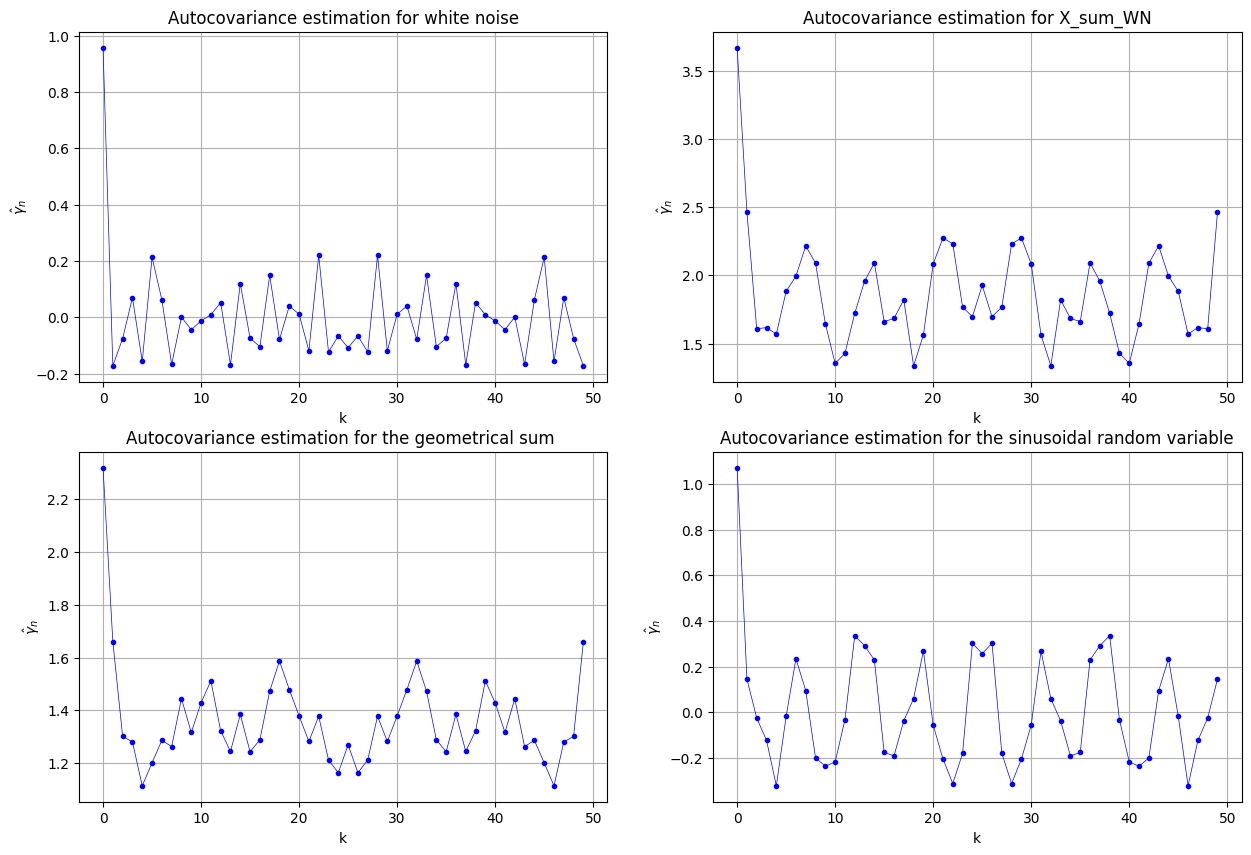

In [10]:
# Plotting the power spectrum for each signal
fig, axes = plt.subplots(2, 2, figsize=(15, 10))


axes[0, 0].plot(autocovariance_estimator(X_WN, n=N), color='blue', linewidth=0.5, marker=".")
axes[0, 0].set_title('Autocovariance estimation for white noise')
axes[0, 0].set_xlabel("k")
axes[0, 0].set_ylabel(r'$\hat{\gamma}_n$')
axes[0, 0].grid()


axes[0, 1].plot(autocovariance_estimator(X_sum_WN, n=N), color='blue', linewidth=0.5, marker=".")
axes[0, 1].set_title('Autocovariance estimation for X_sum_WN')
axes[0, 1].set_xlabel("k")
axes[0, 1].set_ylabel(r'$\hat{\gamma}_n$')
axes[0, 1].grid()


axes[1, 0].plot(autocovariance_estimator(X_sum_geometric_WN, n=N), color='blue',linewidth=0.5, marker=".")
axes[1, 0].set_title('Autocovariance estimation for the geometrical sum ')
axes[1, 0].set_xlabel("k")
axes[1, 0].set_ylabel(r'$\hat{\gamma}_n$')
axes[1, 0].grid()


axes[1, 1].plot(autocovariance_estimator(X_cos_WN, n=N), color='blue', linewidth=0.5, marker=".")
axes[1, 1].set_title('Autocovariance estimation for the sinusoidal random variable')
axes[1, 1].set_xlabel("k")
axes[1, 1].set_ylabel(r'$\hat{\gamma}_n$')
axes[1, 1].grid()
plt.show()

5. In the case of white noise, estimate the variance of the periodogram for several values of $n$ and discuss about it.


In [11]:
# Definition of the variance estimator
def variance_estimator(X, n):
    X_mean = np.mean(X)
    s_estimator = np.sum( (X-X_mean) * np.conj(X-X_mean) )
    return s_estimator/(n-1)

L = []
# Definition of the values of n
N_values = [5, 20 , 200, 1000]
# Creation of the random variables
for i in N_values:
    L.append(white_nosie(number_var=i))
Variance = []
# The computation of the empirical variance of each random variable
for i in range(4):
    Variance.append(variance_estimator(L[i], N_values[i]))
# Printing the results
for i in range(4):
     print(f'The imperical variance of the periodogram of a white noise of {N_values[i]} elements is:{Variance[i]}')


The imperical variance of the periodogram of a white noise of 5 elements is:1.1664873950437626
The imperical variance of the periodogram of a white noise of 20 elements is:1.0833627226532907
The imperical variance of the periodogram of a white noise of 200 elements is:0.996994731531248
The imperical variance of the periodogram of a white noise of 1000 elements is:0.9828480474682435


We can notice the when the number of the random variables is bigger the empirical variance gets closer to the theoritical value